In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/MCC/Thesis/Notebooks/DecisionTree

/content/drive/MyDrive/MCC/Thesis/Notebooks/DecisionTree


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

%matplotlib inline

file = './atus_2009_2019_clean.csv'
df = pd.read_csv(file)
df.shape

(4205588, 12)

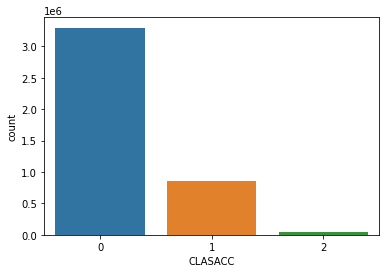

In [4]:
x = df['CLASACC']
ax = sns.countplot(x=x, data=df)

In [ ]:
#x = df['TIPACCID']
#ax = sns.countplot(x=x, data=df)
#x = df['ANIO']
#ax = sns.countplot(x=x, data=df)

In [ ]:
def violin_plots(x,y,data):
    for i, col in enumerate(y):
        plt.figure(i)
        sns.set(rc={'figure.figsize':(11.7,8.27)})
        ax = sns.violinplot(x=x, y=col, data = data)

y = df.loc[:, df.columns != 'CLASACC']
x = df.CLASACC

#violin_plots(x,y,df)

In [ ]:
#y = df.loc[:, df.columns != 'TIPACCID']
#x = df.TIPACCID

#violin_plots(x,y,df)

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.CLASACC = le.fit_transform(df.CLASACC)

df.head()

,ID_HORA,DIASEMANA,TIPACCID,AUTOMOVIL,CAUSAACCI,SEXO,ALIENTO,CINTURON,ID_EDAD,CONDHERIDO,CLASACC,REGION
0,1,0,0,1,0,0,0,0,18,0,0,0
1,11,0,1,0,0,0,1,0,39,0,0,0
2,17,0,1,2,0,0,1,0,44,0,0,0
3,18,0,1,2,0,0,1,0,51,1,1,0
4,19,0,2,1,0,0,1,0,37,0,0,0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

y = df.CLASACC.values.reshape(-1,1)
X = df.drop(['CLASACC'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35, random_state = 42)

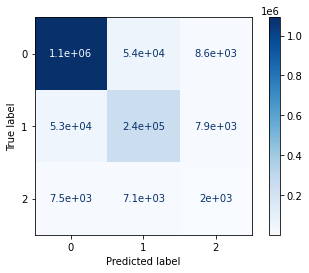

In [7]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

plot_confusion_matrix(clf, X_test,y_test,cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [8]:
scores = cross_val_score(clf, X, y, cv=7)
scores

array([0.87931238, 0.89524783, 0.90355827, 0.9014777 , 0.90833525,
       0.88038742, 0.87930552])

In [9]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.89 accuracy with a standard deviation of 0.01


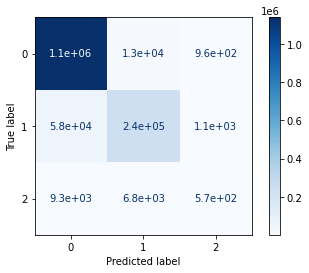

In [12]:
from sklearn.ensemble import RandomForestClassifier

random_clf = RandomForestClassifier(100)

random_clf.fit(X_train, y_train.ravel())

plot_confusion_matrix(random_clf, X_test,y_test,cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [14]:
scores = cross_val_score(random_clf, X, y.ravel(), cv=2)
scores

array([0.92645832, 0.94284081])

In [15]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.93 accuracy with a standard deviation of 0.01


In [ ]:
from sklearn.tree import plot_tree
from IPython.display import Image 
import pydotplus
from sklearn import tree

f_names = df.loc[:, df.columns != 'CLASACC']
#fig = plt.figure(figsize=(25,20))
#_ = plot_tree(clf,feature_names=f_names.columns,class_names=c_names,filled=True)
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=f_names.columns)

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

In [ ]:
graph.write_png("dt.png")

In [ ]:
#fig.savefig("decistion_tree.png")